**Import libraries**

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_dir = '/content/drive/Othercomputers/2 ZenBook/Aditya/Study/Semester-6/Computer Vision/Project/training-images/cell_images/'

In [ ]:
parasitized_img = os.listdir(image_dir + 'Parasitized/') 
uninfected_img = os.listdir(image_dir + 'Uninfected/') 

 **labelling**

In [ ]:
dataset = []
label = []

############ loading parasitized images in dataset list ##############
for idx, image_name in enumerate(parasitized_img):
    if image_name.split('.')[1]=='png':
        image = cv2.imread(image_dir + 'Parasitized/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)

############ loading uninfected images in dataset list ##############
for idx, image_name in enumerate(uninfected_img):
    if image_name.split('.')[1]=='png':
        image = cv2.imread(image_dir + 'Uninfected/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
len(dataset), len(label)


(40, 40)

**Split the data into training set and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset), to_categorical(np.array(label)), test_size=0.2, random_state=69)

**Modelling**

In [ ]:
model1 = tf.keras.Sequential([
        layers.Input(dataset[0].shape),
        layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'),
        layers.MaxPooling2D(pool_size=2),
        layers.BatchNormalization(axis=-1),
        layers.Dropout(rate=0.2),


        layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'),
        layers.MaxPooling2D(pool_size=2),
        layers.BatchNormalization(axis=-1),
        layers.Dropout(rate=0.2),

        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.BatchNormalization(axis=-1),
        layers.Dropout(rate=0.2),

        layers.Dense(128,activation='relu'),
        layers.Dense(2,activation='softmax'),


])
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 5, verbose=1,factor=0.3, min_lr=0.000001)

**Training**

In [ ]:
history = model1.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 12,      
                         validation_split = 0.1,
                         shuffle = False,
                         callbacks = [learning_rate_reduction]
                     )

Epoch 1/12
1/1 [==============================] - 2s 2s/step - loss: 1.1408 - accuracy: 0.2857 - val_loss: 62.0099 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
1/1 [==============================] - 0s 233ms/step - loss: 0.0843 - accuracy: 0.9643 - val_loss: 84.8431 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
1/1 [==============================] - 0s 231ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 94.5977 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
1/1 [==============================] - 0s 271ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 100.6071 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/12
1/1 [==============================] - 0s 327ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 107.8286 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/12
1/1 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1/1 [==============================] - 0s 357ms/step - loss: 0.

**Testing**

In [ ]:
preds = model1.predict(X_test)

In [ ]:
preds = preds.argmax(axis=1)


In [ ]:
y_test = y_test.argmax(axis=1)
score = accuracy_score(y_test,preds)
score

0.625

(-0.5, 63.5, 63.5, -0.5)

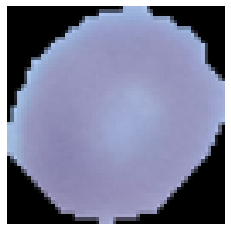

In [ ]:
img = X_test[2]
plt.imshow(img)
plt.axis('off')

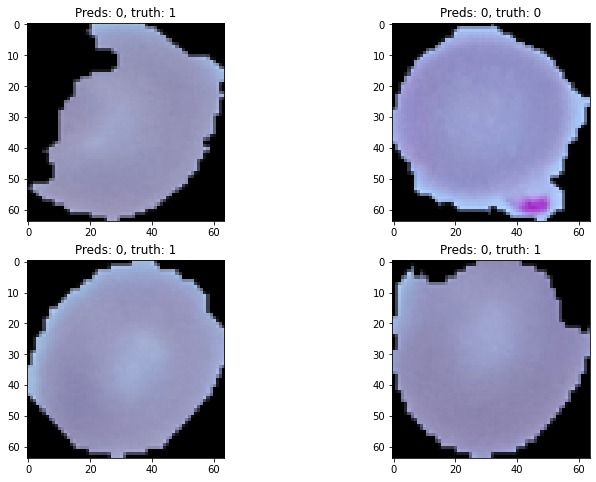

<Figure size 864x1656 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(12, 8))

axs[0, 0].imshow(X_test[0])
axs[0,0].set_title(f'Preds: {preds[0]}, truth: {y_test[0]}')
axs[0, 1].imshow(X_test[1])
axs[0,1].set_title(f'Preds: {preds[1]}, truth: {y_test[1]}')
axs[1, 0].imshow(X_test[2])
axs[1,0].set_title(f'Preds: {preds[2]}, truth: {y_test[2]}')
axs[1, 1].imshow(X_test[3])
axs[1,1].set_title(f'Preds: {preds[3]}, truth: {y_test[3]}')
plt.figure(figsize=(12,23))
plt.show()

